<a href="https://colab.research.google.com/github/meburns2011/Heart-Disease-Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Dataset was entered from phone surveys across the united states. Most of the sections have been scaled down to a single digit by the surveyors that the patients could pick from. Here are the descriptions:
#Age

1 Age 18 to 24

2 Age 25 to 29

3 Age 30 to 34

4 Age 35 to 39

5 Age 40 to 44

6 Age 45 to 49

7 Age 50 to 54

8 Age 55 to 59

9 Age 60 to 64

10 Age 65 to 69

11 Age 70 to 74

12 Age 75 to 79

13 Age 80 or older

#Education
1 Never attended school or only kindergarten

2 Grades 1 through 8 (Elementary)

3 Grades 9 through 11 (Some high school)

4 Grade 12 or GED (High school graduate)

5 College 1 year to 3 years (Some college or technical school)

6 College 4 years or more (College graduate)

#Household Income
1 Less than $10,000

2 Less than $15,000 ($10,000 to less than $15,000)

3 Less than $20,000 ($15,000 to less than $20,000)

4 Less than $25,000 ($20,000 to less than $25,000)

5 Less than $35,000 ($25,000 to less than $35,000)

6 Less than $50,000 ($35,000 to less than $50,000)

7 Less than $75,000 ($50,000 to less than $75,000)

8 $75,000 or more

#General Health
1 Excellent

2 Very Good

3 Good

4 Fair

5 Poor

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
heart_disease = '/content/diabetes_binary_5050split_health_indicators_BRFSS2015.xlsx'
df = pd.read_excel(heart_disease)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37,0,0,0,0,0,...,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29,1,0,1,0,1,...,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

Just glancing at this heatmap doesn't show any strong correlations between any of the columns. There's a weak correlation between physical health, difficulty walking and General Health which is expected.

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [4]:
df.duplicated().sum()

1635

In [5]:
df=df.drop_duplicates()

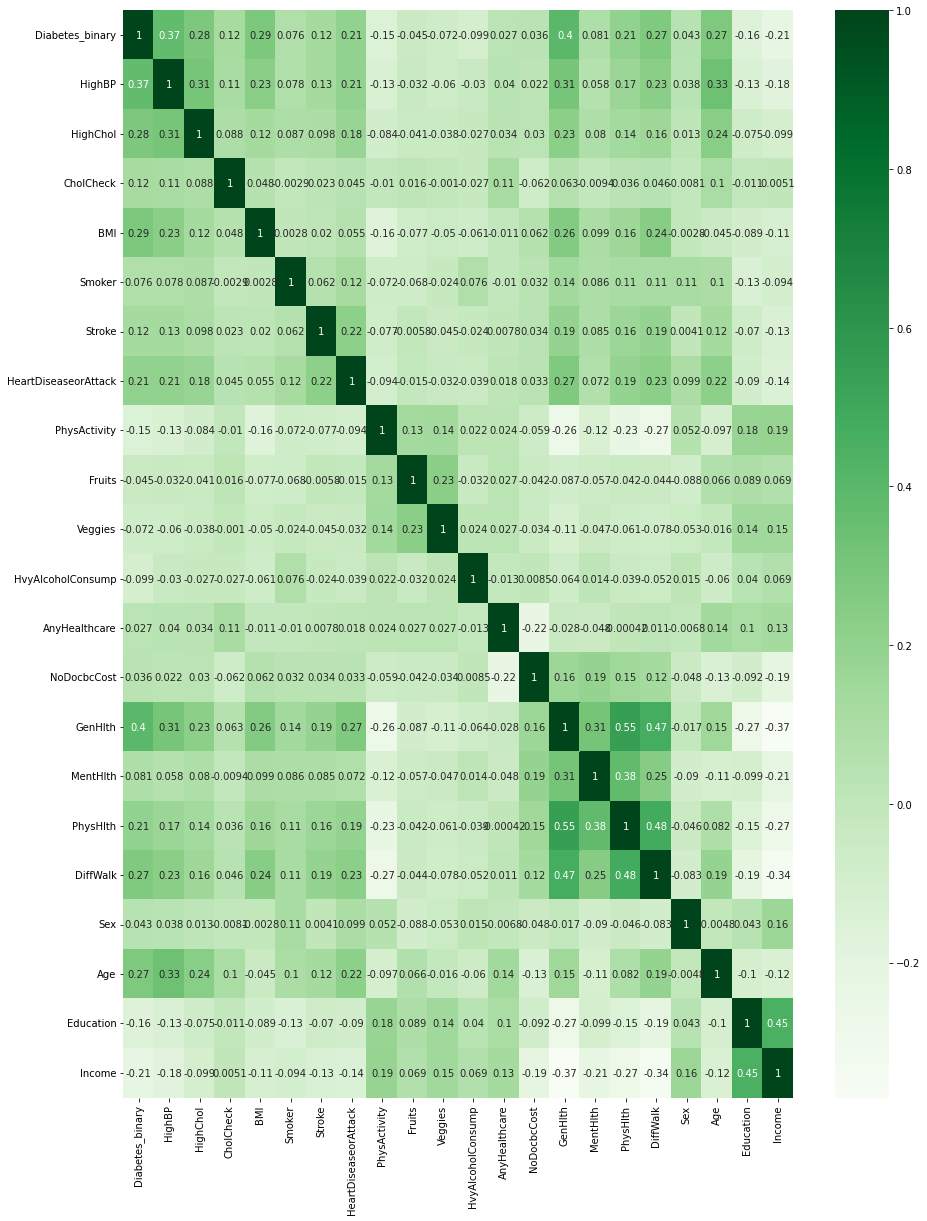

In [6]:
plt.figure(figsize=(15,20))
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

In [7]:
#I'm going to drop the veggies and fruits columns because they only slightly correlate with each other. 
#The data was collected through phone surveys so there is likely some overexaggeration from about how much or often the people being interviewed
# eat fruits and veggies making it unnecessary
df=df.drop(columns=['Fruits','Veggies'])

In [8]:
#Checking for outliers
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.043515,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.204014,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1a18e90>]],
      dtype=object)

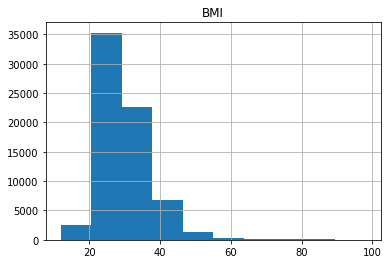

In [ ]:
df.hist('BMI')

In [10]:
#checking for outliers. Nothing unreasonable was found
df.value_counts('BMI')

BMI
27    6118
26    4801
28    4452
30    4282
24    4168
      ... 
85       1
86       1
78       1
74       1
12       1
Length: 80, dtype: int64

Average BMI is between 18.5 and 24.9. Most of the patients in this data set are above the average but the majority only slightly. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1a18d10>]],
      dtype=object)

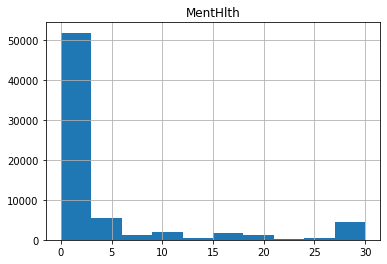

In [ ]:
df.hist('MentHlth')

In [9]:
#checking for outliers, nothing unreasonable found
df.value_counts('MentHlth')

MentHlth
0     46485
30     4320
2      3251
5      2518
1      2041
3      1965
10     1924
15     1767
20     1125
4       981
7       825
25      425
14      353
6       288
8       198
12      130
28       99
21       84
29       53
18       42
16       28
9        28
22       22
17       18
26       17
27       17
13       15
23       13
24       10
11        8
19        7
dtype: int64

#Mental Health
how many days during the pasyt 30 days has your mental health been not good?

Most people said 0 to 3 but there are a few outliers with all 30 days feeling poorly. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae18ddf10>]],
      dtype=object)

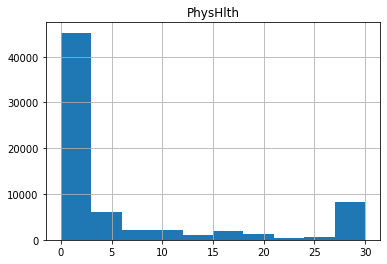

In [ ]:
df.hist('PhysHlth')

#Physical Health
How many days over the past 30 days has your physical health been not good? This question and Mental Health and Physical Health had a weak correlation but we see the same spread of mostly good health with some bad health outliers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae195d210>]],
      dtype=object)

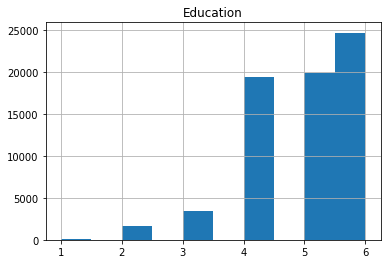

In [ ]:
df.hist('Education')

Most of our patients are educated people and have been to college.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae177d690>]],
      dtype=object)

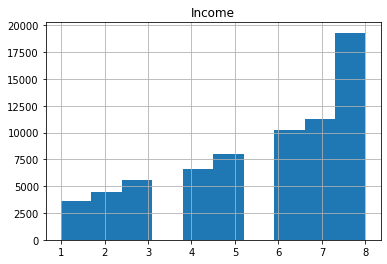

In [ ]:
df.hist('Income')

MOst households make at least 75k a year. 

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.043515,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.204014,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae163ba10>]],
      dtype=object)

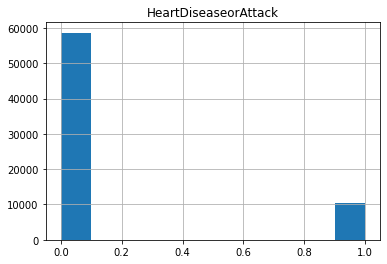

In [ ]:
df.hist('HeartDiseaseorAttack')

The majority in this dataset have not had a heart attack or been diagnosed with heart disease.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae14acfd0>]],
      dtype=object)

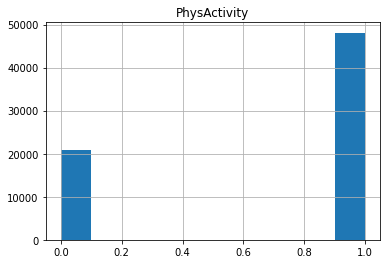

In [ ]:
df.hist('PhysActivity')

#Physical Activity
have you done any physical activity during the last 30 days?
Most people say yes but this doesn't tell us what kind of physical activity, how often or how aggressive the activity was.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1489890>]],
      dtype=object)

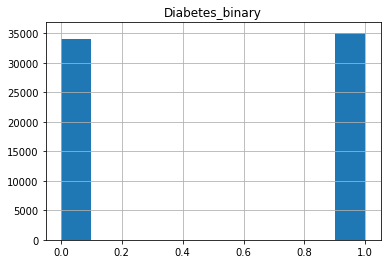

In [ ]:
df.hist('Diabetes_binary')

#Diabetes
Have you beeen diagnosed by a doctor with diabetes?
Pretty even between yes and no.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae13d9fd0>]],
      dtype=object)

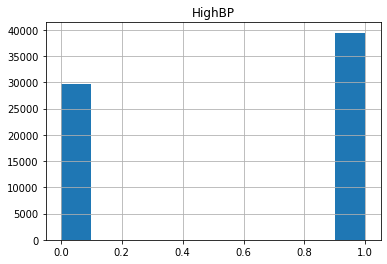

In [ ]:
df.hist('HighBP')

#High  BLood Pressure
HAve you been told by a doctor that you have high blood pressure?
Close to even but more people did have high blood pressure. Since this survey was taken, what is considered to be a high blood pressure has been lowered. It would be interesting to see how much the answer to this question has changed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae13da790>]],
      dtype=object)

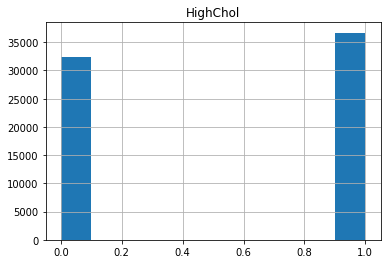

In [ ]:
df.hist('HighChol')

#Cholesterol
HAve you been told by a doctor that you have high cholesterol?
Very similar to the high blood pressure stats. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1267810>]],
      dtype=object)

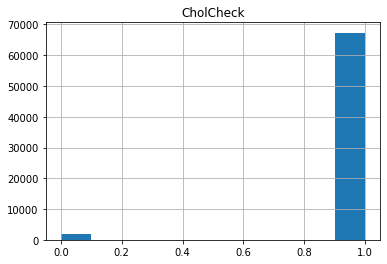

In [ ]:
df.hist('CholCheck')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1214b10>]],
      dtype=object)

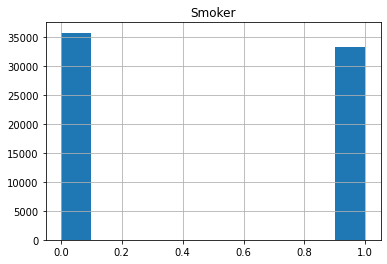

In [ ]:
df.hist('Smoker')

#Smoker
Have you smoked at least 5 packs of cigarrettes in your entire life?
I'm not sure why this question is so harsh? 5 packs during 60 years of life doesn't seem all that ridiculous. Especially knowing that it only takes 3 months since the last cigarette for your lungs to start healing. I don't think this section will offer anything to the predictions so I will be deleting this column.

In [ ]:
df=df.drop(columns='Smoker')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1266590>]],
      dtype=object)

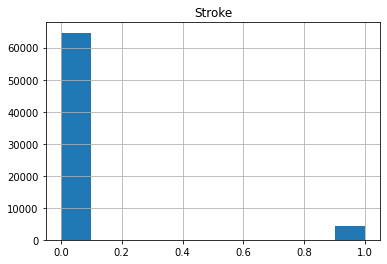

In [ ]:
df.hist('Stroke')

#Stroke
most patients have not have a stroke which is excellent considering half of the patients had high blood pressure. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae11d6690>]],
      dtype=object)

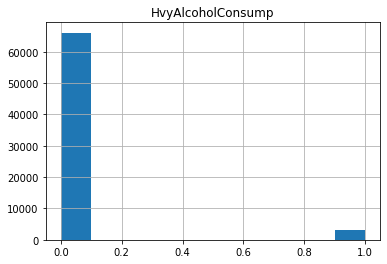

In [ ]:
df.hist('HvyAlcoholConsump')

#Alcohol Consumption
described as adult males having more than 14 drinks per week and adult females having more than 7 drinks per week. 
Most people reported not heavily drinking. But like the fruits and veggies I don't think all the people surveyed were being completely honest. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae1196e50>]],
      dtype=object)

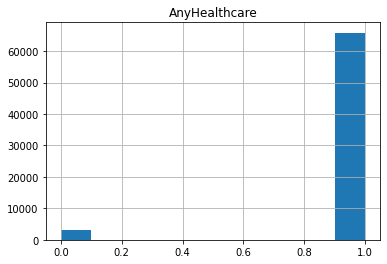

In [ ]:
df.hist('AnyHealthcare')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0fe9c10>]],
      dtype=object)

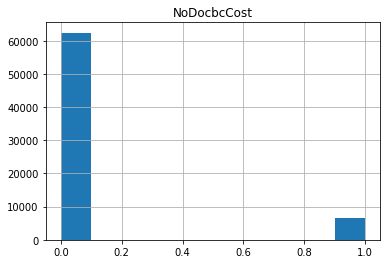

In [ ]:
df.hist('NoDocbcCost')

Most patients fell under income of at least 50,000 so it makes sense that most of these patients have healthcare and are seeing a doctor. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0f85c10>]],
      dtype=object)

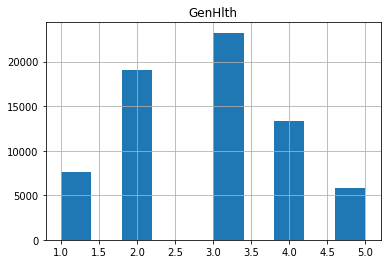

In [ ]:
df.hist('GenHlth')

Most said very good or good. However a suprising amount admitted that they thought their general health was fair or poor which brings the physical activity section back into question. I'm sure if there were more detailed responses available we would see that a large section of patients were only active once or twice a week.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0ee58d0>]],
      dtype=object)

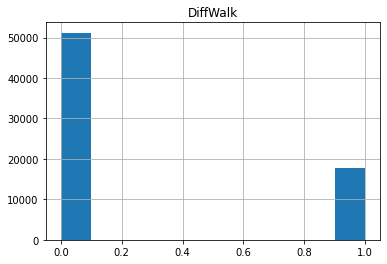

In [ ]:
df.hist('DiffWalk')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0e20790>]],
      dtype=object)

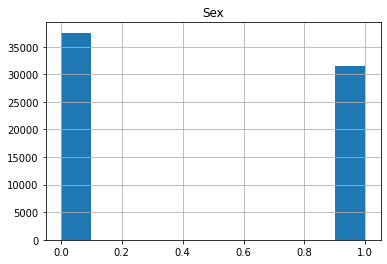

In [ ]:
df.hist('Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae0dab690>]],
      dtype=object)

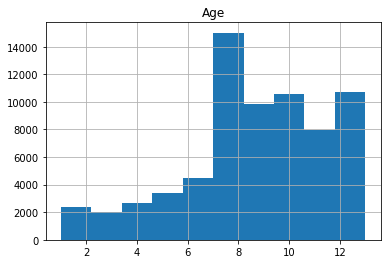

In [ ]:
df.hist('Age')

#Age
most patients were at least in their 60s.